# Counting Methods and Discrete Probability Distributions

When all events have an equal chance of occurring, then the probability of a set of events is simply the **size** of that set of events relative to the size of all possible events. In other words, it is a matter of **counting**, and so we need to review how to count effectively and understand the relationship between counting and discrete probability models.

In [84]:
suppressWarnings(library(ggplot2))

## Counting refresher

Basic counting rules

- independent possibilities multiply
- mutually exclusive possibilities add
- drawing a probability tree
- there are $n!$ ways of arranging a sequence of $n$ distinct objects
- there are ${}^{n}P_{k} = \frac{n!}{(n-k)!}$ ways to arrange sequences of length $k$ chosen from $n$ distinct objects
- there are ${}^{n}C_{k} = \frac{n!}{k!(n-k)!}$ ways to arrange sequences of length $k$ chosen from $n$ distinct objects if we ignore order

In R, ${}^{n}C_{k}$ is given by `choose(n, k)`.

In [1]:
choose(5, 2)

[1] 10

The `combn` function genrates the actual combinations.

In [2]:
combn(letters[1:5], 2)

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
[1,] "a"  "a"  "a"  "a"  "b"  "b"  "b"  "c"  "c"  "d"  
[2,] "b"  "c"  "d"  "e"  "c"  "d"  "e"  "d"  "e"  "e"

The `factorial` function gives the number of ways of arranging $n$ distinct objects. Note how fast the factorial function grows.

In [132]:
factorial(1:10)

[1]       1       2       6      24     120     720    5040   40320  362880
[10] 3628800

There is no built-in funciton to count the number of permuatiosn, but ${}^{n}P_{k}$ can be calculated as `choose(n, k) * factorial(k)` and we can eaisly write a function.

In [3]:
perm <- function(n, k) { choose(n, k) * factorial(k)}

In [4]:
perm(5, 2)

[1] 20

### Example of counting

Suppose there are only 4 nucleotides A, C, T and G and each is equally likely to be found in a DNA sequence. What is the probability of finding exactly 2 As in a string of 5 nucleotides? The size of all possible events is $4^5$ since each of the 5 positions can be filled by any of 4 possible nucleotides. There are ${}^{5}C_{2}$ ways to place 2 As in the 5 positions, and the remaining 3 positions can be filled in $3^3$ ways with C, T or G, so the probability is

$$
\frac{{}^{5}C_{2} 3^3}{4^5}
$$ 

This is a lot of work and it is easy to make errors as you probably recall from recurring nightmares of high school math exams.

#### Solution by counting

In [5]:
(choose(5, 2) * 3^3)/(4^5)

[1] 0.2636719

## Simulation

Alternatively, we can find a solution by simulation. This only gives an approximate solution, but it is much easier for normal humans to reason about than working out permutations and combinations. The main drawback is that simulation can take a long time.

#### Solution by simulation

In [133]:
sample(c('A', 'C', 'T', 'G'), 5, replace=T)

[1] "G" "A" "T" "G" "G"

In [134]:
replicate(3, sample(c('A', 'C', 'T', 'G'), 5, replace=T))

[,1] [,2] [,3]
[1,] "T"  "G"  "T" 
[2,] "G"  "A"  "C" 
[3,] "A"  "T"  "G" 
[4,] "A"  "C"  "A" 
[5,] "C"  "C"  "T"

In [6]:
reps <- 100000
m <- replicate(reps, sample(c('A', 'C', 'T', 'G'), 5, replace=T))
sum(colSums(m=='A') == 2)/reps

[1] 0.26256

## Using a distribution

A shortcut to finding the solution is to recognize that we only care about 2 types of nucleotides - either the nucleotide is an A or it is not. The probability of an A is 0.25. We can use the **binomial** probability distribution to find the solution by calling

```R
dbinom(2, size = 5, p = 0.25)
```

#### Solution using binomial distribution

In [7]:
dbinom(2, size = 5, p = 0.25)

[1] 0.2636719

Using the binomial distribution has the advantage of giving an exact solution (with virtually no work on your part) essentially instantaneously, even if your problem size is larger. For example, suppose we wanted to know how likely it was to get exactly 5 As in a string of 32 nucleotides:

In [8]:
sim <- function(reps, n, q) {
    m <- replicate(reps, sample(c('A', 'C', 'T', 'G'), n, replace=T))
    sum(colSums(m=='A') == q)/reps
}

In [9]:
system.time(print(sim(100000, 32, 5)))

[1] 0.08233


   user  system elapsed 
  2.053   0.130   2.183 

In [10]:
system.time(print(dbinom(5, size = 32, p = 0.25)))

[1] 0.08324571


   user  system elapsed 
      0       0       0 

### Work

You have a DNA sequence of length 12 (AAAAAATTTTTT) and you suspect that it is a fragment from Chromosome 22. Using an alignment algorithm, you find that the sequence aligns perfectly (no mismatches) with a sequence on Chromosome 22 (50 million base pairs). Assume that the nucleotides A, C, T and G are equally likely and randomly distributed on chromosome 22. What is the probability that this could have occurred by chance? 

In [10]:
1 - pbinom(0, 50e6, 0.25^12)

[1] 0.949219

## Discrete distributions

We will see examples of using R for 3 classical discrete distributions important for modeling HTS data - the binomial, negative binomial and Poisson. We work with these distribution in R using the familiar `d`, `p`, `q` and `r` functions.

### Binomial distribution

The binomial distribution models a series of trials, each of which may be a success with probability $p$ or a failure with probability $1-p$, and gives the probability of $k$ successes in $n$ trials. Classically, it is presented in the context of tosses of a possibly biased coin, but it is easy to translate the model to other (e.g. sequencing) setting as we saw in the motivating example.

#### Example: Distribution of number of heads in 10 tosses of a biased coin where p(H) = 0.6

In [86]:
options(repr.plot.width=4, repr.plot.height=3)

#### Using an explicit simulation

In [106]:
expt <- function(size) { 
    sample(1:0, size, replace=T, prob = c(0.6, 0.4)) 
}
expt(10)

[1] 0 1 0 0 1 0 0 1 1 1

In [107]:
replicate(5, expt(10))

[,1] [,2] [,3] [,4] [,5]
 [1,]    0    0    1    1    0
 [2,]    1    1    1    1    1
 [3,]    1    1    1    1    0
 [4,]    0    1    1    0    1
 [5,]    1    1    1    1    0
 [6,]    1    0    1    1    1
 [7,]    1    0    1    1    1
 [8,]    0    0    0    0    1
 [9,]    0    1    0    1    1
[10,]    1    0    1    0    1

In [108]:
counts <- colSums(replicate(n, expt(10)))

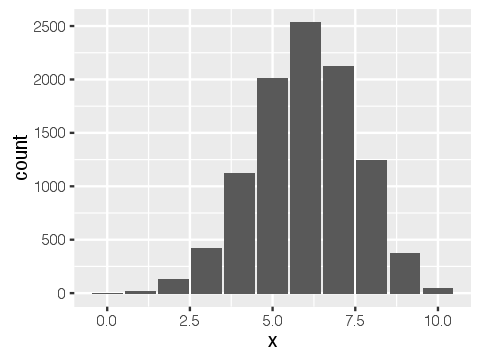

In [109]:
ggplot(data.frame(x=counts), aes(x=x)) + geom_bar()

#### Using random numbers from `rbinom`

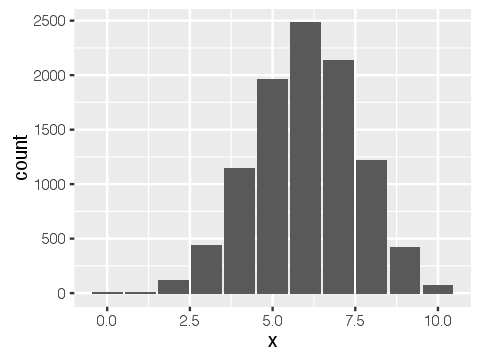

In [94]:
n <- 10000
counts <- rbinom(n, 10, 0.6)
ggplot(data.frame(x=counts), aes(x=x)) + geom_bar()

#### Using the density function of the binomial distribution

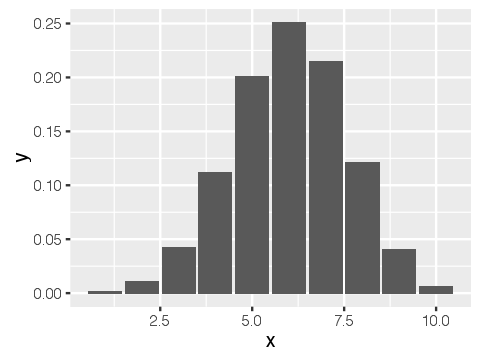

In [87]:
x <- 1:10
y <- dbinom(x, size=10, p=0.6)
ggplot(data.frame(x=x, y=y), aes(x=x, y=y)) + geom_bar(stat="identity")

### Work

**1**. In a double heterozygote cross $Aa \times Aa$, what is the probability that 3 or more of the 17 offspring have the $AA$ genotype assuming Mendelian genetics? Use the binomial distribution to find thee solution, then run a simulation with 10000 reps to check your answer.

In [14]:
1 - pbinom(2, size=17, prob = 0.25)

[1] 0.8362976

#### Explicit simulation

In [15]:
reps <- 10000
m <- replicate(reps, sample(c('AA', 'aa', 'Aa', 'Aa'), 17, replace=T))
sum(colSums(m=='AA') >= 3)/reps

[1] 0.8404

#### More efficient simulation

In [16]:
sum(rbinom(n = reps, size = 17, prob = 0.25) >= 3)/reps

[1] 0.8374

## Negative binomial distribution

The negative binomial distribution addresses the question of how many trials it will take until we see $k$ successes if the probability of a success in each trial is $p$.

#### Example: Distribution of number of tosses needed to get 5 heads if p(HEADS) = 0.4

Note: R's `dbinom` function expects the number of **failures** expected before $k$ successes are achieved as the first argument. You can easily convert this to the number of trials by adding $k$.

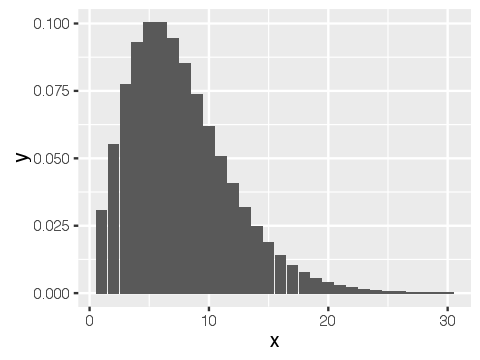

In [123]:
x <- 1:30
y <- dnbinom(x, size=5, p=0.4)
ggplot(data.frame(x=x, y=y), aes(x=x, y=y)) + geom_bar(stat="identity")

#### Explicit simulation

In [118]:
expt <- function (k=5) {
    tosses <- 0
    heads <- 0
    while (heads != k) {
        tosses <- tosses + 1
        outcome <- sample(c("H", "T"), 1, prob = c(0.4, 0.6))
        if (outcome == "H") {
            heads <- heads + 1
        }
    }
    return(tosses - k)
}

In [119]:
n <- 10000
res <- rep(NA, n)
for (i in 1:n) {
    res[i] <- expt()
}

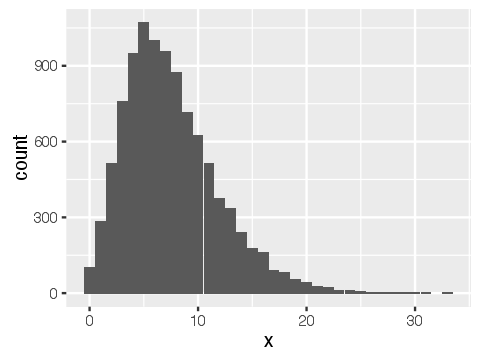

In [122]:
ggplot(data.frame(x=res), aes(x=x)) + geom_bar() 

#### What is the probability that number of failures is 10 or fewer?

In [125]:
sum(res <= 10)/n

[1] 0.785

In [126]:
pnbinom(10, size=5, prob=0.4)

[1] 0.7827223

#### What is the number of failures at the 78th percentile?

In [127]:
sort(res)[floor(0.78*n)]

[1] 10

In [19]:
qnbinom(p = 0.78, size=5, prob=0.4)

[1] 10

### Work

**2**. You are aligning sequences to a reference genome at some locus where the reference allele is `A` (see row `Ref` picture). Most of the aligned sequences match perfectly, but 10% of the time, you get a `T` instead of an `A` (see row 3 in picture). What coverage (number of aligned sequences) do you need to be have 99% probability of getting at least 30 sequences with `A` in that position?

```
XXXAXXX (Ref)
XXXAXXX (1)
XXXAXXX (2)
XXXTXXX (3)
XXXAXXX (4)
XXXAXXX (5)
```

In [20]:
30 + qnbinom(p = 0.99, size = 30, prob = 0.9)

[1] 39

**3**. Now use a simulation with 10000 reps to confirm the answer you obtained in exercise 2.

In [21]:
reps <- 10000
sum(rbinom(n = reps, size = 39, prob = 0.9) >= 30)/reps

[1] 0.9956

## Poisson distribution

The binomial distribution is relatively expensive, and it is common to approximate it using other distributions that are cheaper to compute. When $n$ and $p$ are both relatively large, the binomial can be approximated by the normal distribution with mean $np$ and standard deviation $\sqrt{np(1-p)}$.

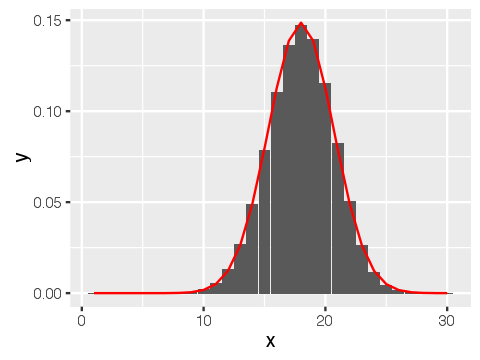

In [22]:
x <- 1:30
y <- dbinom(x, size=30, p=0.6)
y1 <- dnorm(x, mean=30*0.6, sd=sqrt(30*0.6*0.4))

ggplot(data.frame(x=x, y=y), aes(x=x, y=y)) + 
  geom_bar(stat="identity") + 
  geom_line(data=data.frame(x=x, y=y1), color="red")

When $p$ is small ("rare events"), we use the Poisson distribution to approximate the binomial.

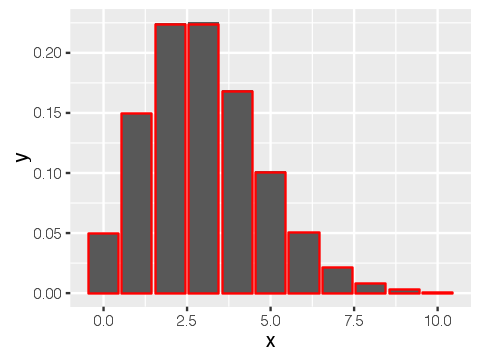

In [23]:
n <- 300
p <- 0.01

x <- 0:10
y <- dbinom(x, size=n, p=p)
y1 <- dpois(x, lambda = n*p)

ggplot(data.frame(x=x, y=y), aes(x=x, y=y)) + 
  geom_bar(stat="identity") + 
  geom_bar(data=data.frame(x=x, y=y1), stat="identity", alpha=0.5, color="red")

In [24]:
round(data.frame(k=x, binom=y, poiss=y1), 3)

k binom poiss
1   0 0.049 0.050
2   1 0.149 0.149
3   2 0.224 0.224
4   3 0.225 0.224
5   4 0.169 0.168
6   5 0.101 0.101
7   6 0.050 0.050
8   7 0.021 0.022
9   8 0.008 0.008
10  9 0.003 0.003
11 10 0.001 0.001

### Work

**4**. If there is a de novo mutation on average once every 100 million bases, plot the distribution of the number of de novo mutations in a human genome of 6 billion bases. Use $\pm 30$ from the calculated mean value for the x-axis.

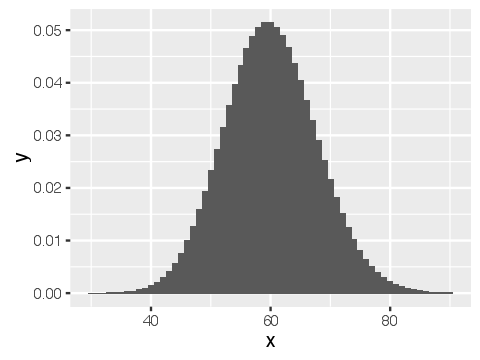

In [25]:
n <- 6e9
p <- 1e-8

x <- 30:90
y <- dpois(x, lambda = n*p)

ggplot(data.frame(x=x, y=y), aes(x=x, y=y)) + 
  geom_bar(stat="identity")

### Work

**5**. The rules of the dice game **craps** are - you roll two dice - on the first roll, if the sum is 2, 3 or 12, you lose. If the sum is 7 or 11, you win. Otherwise, you roll again. On subsequent rolls, if you roll your original number, you win. If you roll a 7, you lose. Repeat until you win or lose.

- How would you simulate rolling two dice in R?
- Write a function to simulate a single game of craps, returning 1 if you win and 0 if you lose.
- Run 10,000 simulated games to estimate your probability of winning
- What is the probability that the game stops after the first roll?
- Assuming that you a 10 on the first roll, what is the probability that it will take more than 5 rolls (including the first) before the game ends?
![Two Dice](https://bestcase.files.wordpress.com/2011/01/dicediagram.jpg)

#### Simulating two dice rolls

In [3]:
sample(1:6, 2, replace = T)

[1] 6 5

#### Function for a single game of craps

In [18]:
craps <- function() {
    first.roll <- sum(sample(1:6, 2, replace = T))
    if (first.roll %in% c(2, 3, 12)) {
        return(0)
    } else if (first.roll %in% c(7, 11)) {
        return(1)
    } else {
        while(T) {
            roll <- sum(sample(1:6, 2, replace = T))
            if (roll == first.roll) {
                return(1)
            } else if (roll == 7) {
                return(0)
            }
        }
    }
}

#### How many wins in repeated games?

In [37]:
n <- 10000
games <- rep(NA, n)
for (i in 1:n) {
    games[i] <- craps()
}
sum(games)/n

ERROR: Error: could not find function "craps"


#### Simulation for number of rolls

In [68]:
craps.rolls <- function() {
    k <- 1
    while(T) {
        k <- k + 1
        roll <- sum(sample(1:6, 2, replace = T))
        if (roll %in% c(10, 7)) {
            return(k)
        }
    }
}

In [80]:
n <- 10000
rolls <- rep(NA, n)
for (i in 1:n) {
    rolls[i] <- craps.rolls()
}

#### Probability of stopping on the first roll

In [50]:
(1 + 2 + 6 + 2 + 1)/36

[1] 0.3333333

#### Probability of game lasting 5 or more rolls

Matching number of failures to number of rolls

```
Failures Rolls
0        2
1        3
2        4
```

In [78]:
1 - pnbinom(2, 1, 1/4)

[1] 0.421875

In [69]:
sum(rolls>=5)/n

[1] 0.4201